# Lending Club Case Study

## Problem Statement
Lending Club is place facilitating different kinds of loans for different purposes. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. 
<br> We have the data from Lending Club about past loan applicants and whether they 'defaulted' or not.<br> The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In [1]:
#Importing required libraries and applying required settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.width', 400)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams['figure.figsize'] = (15, 8)
sns.set(style="dark")
sns.set_palette('tab10')

In [2]:
#loading and reading dataset, and looking at first 5 rows
data = pd.read_csv('loan.csv')
data.head()

C:\Users\revat\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-15,171.620,NaN,May-16,0.000,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.000,0.000,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,NaN,Sep-13,0.000,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.000,36 months,15.96%,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.720,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.000,0.000,3005.667,3005.670,2400.000,605.670,0.000,0.000,0.000,Jun-14,649.910,NaN,May-16,0.000,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.000,36 months,13.49%,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.000,0,Feb-96,1,35.000,nan,10,0,5598,21%,37,f,0.000,0.000,12231.890,12231.890,10000.000,2214.920,16.970,0.000,0.000,Jan-15,357.480,NaN,Apr-16,0.000,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,n

In [3]:
#Let's look at the data and it's overview
print("The shape of the data: ",data.shape)

The shape of the data:  (39717, 111)


In [4]:
print(list(data.columns))

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il

In [5]:
print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,14035.000,2786.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39661.000,0.000,39717.000,0.000,0.000,0.000,39717.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,39661.000,39717.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,39020.000,39678.000,0.000,0.000,0.000,0.000
mean,683131.913,850463.559,11219.444,10947.713,10397.449,324.562,68968.926,13.315,0.147,0.869,35.901,69.698,9.294,0.055,13382.528,22.089,51.228,50.990,12153.597,11567.149,9793.349,2263.663,1.363,95.222,12.406,2678.826,0.000,nan,1.000,nan,nan,nan,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.043,0.000,nan,nan,nan,nan
std,210694.133,265678.307,7456.671,7187.239,7128.450,208.875,63793.766,6.679,0.492,1.070,22.020,43.823,4.400,0.237,15885.017,11.402,375.173,373.824,9042.041,8942.673,7065.522,2608.112,7.290,688.745,148.672,4447.136,0.000,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.204,0.000,nan,nan,nan,nan
min,54734.000,70699.000,500.000,500.000,0.000,15.690,4000.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,1.000,nan,nan,nan,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
25%,516221.000,666780.000,5500.000,5400.000,5000.000,167.020,40404.000,8.170,0.000,0.000,18.000,22.000,6.000,0.000,3703.000,13.000,0.000,0.000,5576.930,5112.310,4600.000,662.180,0.000,0.000,0.000,218.680,0.000,nan,1.000,nan,nan,nan,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
50%,665665.000,850812.000,10000.000,9600.000,8975.000,280.220,59000.000,13.400,0.000,1.000,34.000,90.000,9.000,0.000,8850.000,20.000,0.000,0.000,9899.640,9287.150,8000.000,1348.910,0.000,0

In [6]:
#checking for the null values across the columns
round(data.isnull().sum()/data.shape[0] * 100, 2)

id                                 0.000
member_id                          0.000
loan_amnt                          0.000
funded_amnt                        0.000
funded_amnt_inv                    0.000
term                               0.000
int_rate                           0.000
installment                        0.000
grade                              0.000
sub_grade                          0.000
emp_title                          6.190
emp_length                         2.710
home_ownership                     0.000
annual_inc                         0.000
verification_status                0.000
issue_d                            0.000
loan_status                        0.000
pymnt_plan                         0.000
url                                0.000
desc                              32.580
purpose                            0.000
title                              0.030
zip_code                           0.000
addr_state                         0.000
dti             

As we can see, there are multiple columns with 100% null values, we can safely remove them as they are not useful in analysis and taking extra memory for no use.

In [7]:
#Removing null valued columns
data.dropna(axis=1, how='all', inplace=True)

#Now, let's look at the remaining columns from data
print("The remaining number of columns are", data.shape[1], '\n')
print(data.columns)

The remaining number of columns are 57 

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


In [8]:
#Let's check for the first 5 rows and overview for updated data
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-15,171.620,NaN,May-16,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000
1,1077430,1314167,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.000,0.000,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,NaN,Sep-13,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000
2,1077175,1313524,2400,2400,2400.000,36 months,15.96%,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.720,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.000,0.000,3005.667,3005.670,2400.000,605.670,0.000,0.000,0.000,Jun-14,649.910,NaN,May-16,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000
3,1076863,1277178,10000,10000,10000.000,36 months,13.49%,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.000,0,Feb-96,1,35.000,nan,10,0,5598,21%,37,f,0.000,0.000,12231.890,12231.890,10000.000,2214.920,16.970,0.000,0.000,Jan-15,357.480,NaN,Apr-16,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000
4,1075358,1311748,3000,3000,3000.000,60 months,12.69%,67.790,B,B5,University Medical Group,1 year,RENT,80000.000,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.940,0,Jan-96,0,38.000,nan,15,0,27783,53.90%,38,f,524.060,524.060,3513.330,3513.330,2475.940,1037.390,0.000,0.000,0.000,May-16,67.790,Jun-16,May-16,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000


In [9]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,14035.000,2786.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39661.000,39717.000,39717.000,39661.000,39717.000,39020.000,39678.000
mean,683131.913,850463.559,11219.444,10947.713,10397.449,324.562,68968.926,13.315,0.147,0.869,35.901,69.698,9.294,0.055,13382.528,22.089,51.228,50.990,12153.597,11567.149,9793.349,2263.663,1.363,95.222,12.406,2678.826,0.000,1.000,0.000,0.000,0.000,0.043,0.000
std,210694.133,265678.307,7456.671,7187.239,7128.450,208.875,63793.766,6.679,0.492,1.070,22.020,43.823,4.400,0.237,15885.017,11.402,375.173,373.824,9042.041,8942.673,7065.522,2608.112,7.290,688.745,148.672,4447.136,0.000,0.000,0.000,0.000,0.000,0.204,0.000
min,54734.000,70699.000,500.000,500.000,0.000,15.690,4000.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
25%,516221.000,666780.000,5500.000,5400.000,5000.000,167.020,40404.000,8.170,0.000,0.000,18.000,22.000,6.000,0.000,3703.000,13.000,0.000,0.000,5576.930,5112.310,4600.000,662.180,0.000,0.000,0.000,218.680,0.000,1.000,0.000,0.000,0.000,0.000,0.000
50%,665665.000,850812.000,10000.000,9600.000,8975.000,280.220,59000.000,13.400,0.000,1.000,34.000,90.000,9.000,0.000,8850.000,20.000,0.000,0.000,9899.640,9287.150,8000.000,1348.910,0.000,0.000,0.000,546.140,0.000,1.000,0.000,0.000,0.000,0.000,0.000
75%,837755.000,1047339.000,15000.000,15000.000,14400.000,430.780,82300.000,18.600,0.000,1.000,52.000,104.000,12.000,0.000,17058.000,29.000,0.000,0.000,16534.433,15798.810,13653.260,2833.400,0.000,0.000,0.000,3293.160,0.000,1.000,0.000,0.000,0.000,0.000,0.000
max,1077501.000,1314167.000,35000.000,35000.000,35000.000,1305.190,6000000.000,29.990,11.000,8.000,120.000,129.000,44.000,4.000,149588.000,90.000,6311.470,6307.370,58563.680,58563.680,35000.020,23563.680,180.200,29623.350,7002.190,36115.200,0.000,1.000,0.000,0.000,0.000,2.000,0.000


In [10]:
#From the dataset view, we can say there are many single valued columns, let's confirm it
print(data['pymnt_plan'].value_counts())
print(data['initial_list_status'].value_counts())
print(data['collections_12_mths_ex_med'].value_counts())
print(data['policy_code'].value_counts())
print(data['application_type'].value_counts())
print(data['acc_now_delinq'].value_counts())
print(data['chargeoff_within_12_mths'].value_counts())
print(data['delinq_amnt'].value_counts())
print(data['pub_rec_bankruptcies'].value_counts())
print(data['tax_liens'].value_counts())

n    39717
Name: pymnt_plan, dtype: int64
f    39717
Name: initial_list_status, dtype: int64
0.000    39661
Name: collections_12_mths_ex_med, dtype: int64
1    39717
Name: policy_code, dtype: int64
INDIVIDUAL    39717
Name: application_type, dtype: int64
0    39717
Name: acc_now_delinq, dtype: int64
0.000    39661
Name: chargeoff_within_12_mths, dtype: int64
0    39717
Name: delinq_amnt, dtype: int64
0.000    37339
1.000     1674
2.000        7
Name: pub_rec_bankruptcies, dtype: int64
0.000    39678
Name: tax_liens, dtype: int64


````pub_rec_bankruptcies```` has almost 99% data single valued and other columns from above are single-valued, so they will not be useful in the analysis. We can drop them.

In [11]:
#Let's remove the single valued data columns
single_valued_cols = ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']
data.drop(single_valued_cols, axis=1, inplace=True)

#Now, let's look at remaining columns
print(data.shape[1])
print(data.columns)

47
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d'],
      dtype='object')


In the data, there are some __Demographic__ and __Behavioural__ variables won't be useful for analysis as some of them are post-approval features and some of them are not useful for loan data analysis such as ````id```` and ````member_id````.
<br> 

````id```` : not useful for analysis<br> 
````member_id```` : not useful for analysis<br> 
````emp_title```` : company or person name is not useful for analysis<br> 
````url```` : we can get information through NLP but not useful for EDA<br> 
````desc```` : we can get information through NLP but not useful for EDA<br> 
````title```` :  not useful for analysis<br> 
````zip_code```` : As complete value for ````zip_code```` is not available, it is not useful<br>
````addr_state```` : As more data is from single state, not much useful<br>
````earliest_cr_line```` : As we have the open credit lines and total credit lines, and the column contains many distinct values, not very useful<br> 
````mths_since_last_delinq````, ````mths_since_last_record```` : more than 60% values are null, nit much useful<br> 
````out_prncp_inv````, ````total_pymnt_inv```` :  useful for investors but not for the analysis<br> 
````last_credit_pull_d```` : not related to loan approval<br> 


Post-approval features are ````delinq_2yrs````, ````revol_bal````, ````out_prncp````, ````total_pymnt````, ````total_rec_prncp````, ````total_rec_int````, ````total_rec_late_fee````, ````recoveries````, ````collection_recovery_fee````, ````last_pymnt_d````, ````last_pymnt_amnt````, ````next_pymnt_d````


<br> We can drop these columns for further analysis.

In [12]:
#Dropping the above mentioned columns
cols_to_drop = ['id', 'member_id', 'emp_title', 'url', 'desc', 'title', 'zip_code',
                'mths_since_last_delinq', 'mths_since_last_record', 'out_prncp_inv','total_pymnt_inv', 'last_credit_pull_d',
                'earliest_cr_line','addr_state', 'delinq_2yrs', 'revol_bal', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int',
                'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d']

data.drop(cols_to_drop, axis=1, inplace=True)

#Let's check the remaining columns
print("The remaining number of columns are", data.shape[1])
print(data.columns)

The remaining number of columns are 21
Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc'], dtype='object')


In [13]:
#checking for the null values across the columns for updated data
round(data.isnull().sum()/data.shape[0] * 100, 2)

loan_amnt             0.000
funded_amnt           0.000
funded_amnt_inv       0.000
term                  0.000
int_rate              0.000
installment           0.000
grade                 0.000
sub_grade             0.000
emp_length            2.710
home_ownership        0.000
annual_inc            0.000
verification_status   0.000
issue_d               0.000
loan_status           0.000
purpose               0.000
dti                   0.000
inq_last_6mths        0.000
open_acc              0.000
pub_rec               0.000
revol_util            0.130
total_acc             0.000
dtype: float64

````emp_length```` has around 3% null values and ````revol_util```` has around 0.1% null values, we can drop them as this features are important for loan analysis.

In [14]:
#Let's drop the null values
data.dropna(subset=['emp_length'], axis=0, inplace=True)
data.dropna(subset=['revol_util'], axis=0, inplace=True)

In [15]:
#Let's check if data has null values and has correct datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38595 entries, 0 to 39716
Data columns (total 21 columns):
loan_amnt              38595 non-null int64
funded_amnt            38595 non-null int64
funded_amnt_inv        38595 non-null float64
term                   38595 non-null object
int_rate               38595 non-null object
installment            38595 non-null float64
grade                  38595 non-null object
sub_grade              38595 non-null object
emp_length             38595 non-null object
home_ownership         38595 non-null object
annual_inc             38595 non-null float64
verification_status    38595 non-null object
issue_d                38595 non-null object
loan_status            38595 non-null object
purpose                38595 non-null object
dti                    38595 non-null float64
inq_last_6mths         38595 non-null int64
open_acc               38595 non-null int64
pub_rec                38595 non-null int64
revol_util             38595 non-null

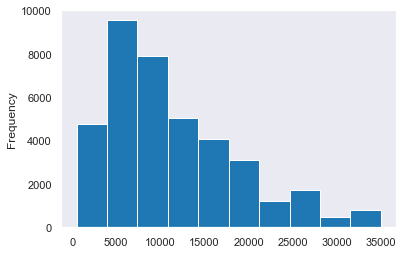

In [16]:
data['loan_amnt'].plot.hist()

````loan_amnt```` is left-skewed as there are less applicants applying for high amounts. We can see, people applying for amounts from 5000-20000 are much more than people applying for amounts higher than 20000.

In [17]:
data['term'].value_counts() #looking for different values of term

 36 months    28243
 60 months    10352
Name: term, dtype: int64

In [18]:
#We can see the 'months' in term value will cause problem while doing mathematical operations , so let's fix the values.
data['term'] = pd.to_numeric(data['term'].apply(lambda x: int(x[:3]) if x else None)) # removing months from the values

#Let's look at updated values
data['term'].head()

0    36
1    60
2    36
3    36
4    60
Name: term, dtype: int64

In [19]:
data['int_rate'].value_counts() #looking for different values of interest rate

10.99%    932
13.49%    813
11.49%    800
7.51%     756
7.88%     701
         ... 
17.46%      1
16.96%      1
16.33%      1
20.52%      1
16.71%      1
Name: int_rate, Length: 371, dtype: int64

In [20]:
#The values for int_rate has % at the end of each value, let's fix it.
data['int_rate'] = pd.to_numeric(data['int_rate'].apply(lambda x: x[:-1] if x else None)) #removing the % sign from values
data['int_rate'].head()

0   10.650
1   15.270
2   15.960
3   13.490
4   12.690
Name: int_rate, dtype: float64

In [21]:
#The values for sub_grade are grade and its sub level at the end of each value, from that we can extract the int value that is sub value for each grade.
data['sub_grade'] = pd.to_numeric(data['sub_grade'].apply(lambda x: x[-1] if x else None)) #removing the % sign from values
data['sub_grade'].head()

0    2
1    4
2    5
3    1
4    5
Name: sub_grade, dtype: int64

In [22]:
data['emp_length'].value_counts() #looking for different values of employment length

10+ years    8878
< 1 year     4571
2 years      4383
3 years      4091
4 years      3429
5 years      3278
1 year       3234
6 years      2226
7 years      1770
8 years      1477
9 years      1258
Name: emp_length, dtype: int64

In [23]:
#We need to fix values for 10+ and < 1 to correct its data type and perform different operations
data['emp_length'] = pd.to_numeric(data['emp_length'].apply(lambda x : 0 if '<' in x else (x.split('+')[0] if '+' in str(x) else x.split()[0])))

We have a column ````issue_d````, from this column we can extract the month and year of loan issued/funded.

In [24]:
data['issue_m'] = data['issue_d'].apply(lambda x: str(x.split("-")[0] if x else None)) #month when tghe loan funded
data['issue_y'] = data['issue_d'].apply(lambda x: str(x.split("-")[1] if x else None)) #year when the loan funded

In [25]:
data['loan_status'].value_counts() #looking for different values of loan status

Fully Paid     32113
Charged Off     5384
Current         1098
Name: loan_status, dtype: int64

As we are analyzing the loan applicants whether they defaulters or not, we cannot infer 'Current' category whether they will pay the loan or not. So, we need to drop the data with 'Current' ````loan_status````

In [26]:
data = data[~(data['loan_status'] == 'Current')]

#Let's look at loan_status again
data['loan_status'].value_counts()

Fully Paid     32113
Charged Off     5384
Name: loan_status, dtype: int64

In [27]:
round(data['purpose'].value_counts(normalize=True)*100)

debt_consolidation   47.000
credit_card          13.000
other                10.000
home_improvement      7.000
major_purchase        6.000
small_business        5.000
car                   4.000
wedding               2.000
medical               2.000
moving                1.000
house                 1.000
vacation              1.000
educational           1.000
renewable_energy      0.000
Name: purpose, dtype: float64

The values for purpose of loan like moving, house are around 1%, so we can't conclude anything from such small values. We can drop them to get much clearer picture.

In [28]:
less_vals_purpose = ['moving', 'house', 'vacation', 'educational', 'renewable_energy']
data = data[~(data['purpose'].isin(less_vals_purpose))] #removing the mentioned values

In [29]:
#The values for revol_util has % at the end of each value, let's fix it.
data['revol_util'] = pd.to_numeric(data['revol_util'].apply(lambda x: x[:-1] if x else None)) #removing the % sign from values
data['revol_util'].head()

0   83.700
1    9.400
2   98.500
3   21.000
5   28.300
Name: revol_util, dtype: float64

In [30]:
#Using describe(), checking different quantile values for data
data.describe(percentiles=[0.25, 0.5, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99])

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
count,35838.000,35838.000,35838.000,35838.000,35838.000,35838.000,35838.000,35838.000,35838.000,35838.000,35838.000,35838.000,35838.000,35838.000,35838.000
mean,11276.723,11006.162,10431.040,42.004,11.976,329.019,3.056,4.969,69641.555,13.373,0.864,9.340,0.054,49.214,22.195
std,7351.548,7094.646,7036.087,10.395,3.689,208.853,1.396,3.556,65090.047,6.639,1.065,4.384,0.235,28.189,11.398
min,500.000,500.000,0.000,36.000,5.420,15.690,1.000,0.000,4080.000,0.000,0.000,2.000,0.000,0.000,2.000
25%,5600.000,5600.000,5000.000,36.000,8.940,170.840,2.000,2.000,41883.000,8.280,0.000,6.000,0.000,26.100,14.000
50%,10000.000,10000.000,9000.000,36.000,11.830,285.950,3.000,4.000,60000.000,13.480,1.000,9.000,0.000,49.700,21.000
75%,15000.000,15000.000,14375.000,60.000,14.460,435.605,4.000,9.000,83004.000,18.610,1.000,12.000,0.000,72.600,29.000
80%,16750.000,16000.000,15152.097,60.000,15.230,486.620,5.000,10.000,90000.000,19.760,2.000,13.000,0.000,77.500,31.000
85%,20000.000,18500.000,17850.000,60.000,15.990,534.650,5.000,10.000,100000.000,20.970,2.000,14.000,0.000,82.500,34.000
90%,22000.000,20500.000,20000.000,60.000,16.820,627.864,5.000,10.000,117000.000,22.340,2.000,15.000,0.000,87.900,38.000


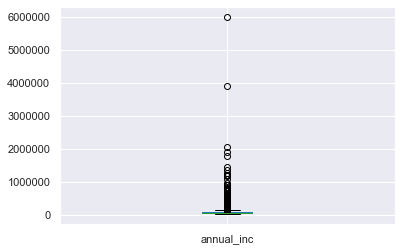

<Figure size 1080x576 with 0 Axes>

In [31]:
#box-plot for checking outliers for annual income
data[['annual_inc']].boxplot()
plt.figure(figsize=(15,8))
plt.show()

In [32]:
#different quantile values for annual_inc
print(data['annual_inc'].quantile(0.75))
print(data['annual_inc'].quantile(0.95))
print(data['annual_inc'].quantile(0.99))

83004.0
142000.0
234849.47999999896


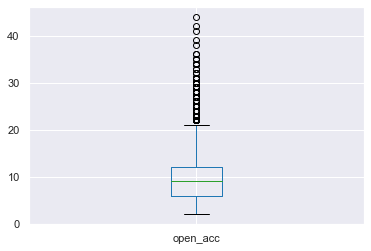

<Figure size 1080x576 with 0 Axes>

In [33]:
#box-plot for checking outliers for open account
data[['open_acc']].boxplot()
plt.figure(figsize=(15,8))
plt.show()

In [34]:
#different quantile values for open credit lines
print(data['open_acc'].quantile(0.99))
print(data['open_acc'].quantile(0.995))
print(data['open_acc'].quantile(0.997))
print(data['open_acc'].quantile(0.999))
print(max(data['open_acc']))

22.0
24.0
26.0
30.0
44


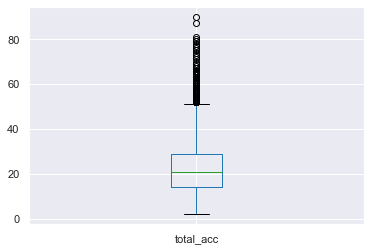

<Figure size 1080x576 with 0 Axes>

In [35]:
#box-plot for checking outliers for total credit lines
data[['total_acc']].boxplot()
plt.figure(figsize=(15,8))
plt.show()

In [36]:
#different quantile values for total_acc
print(data['total_acc'].quantile(0.95))
print(data['total_acc'].quantile(0.98))
print(data['total_acc'].quantile(0.99))

43.0
51.0
56.0


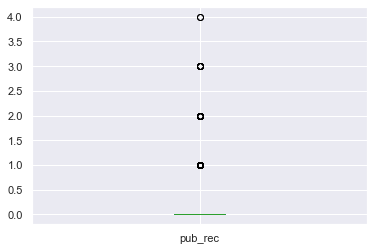

<Figure size 1080x576 with 0 Axes>

In [37]:
#box-plot for checking outliers for derogatory public records
data[['pub_rec']].boxplot()
plt.figure(figsize=(15,8))
plt.show()

From the quantile values and box plots, we can see ````annual_inc````, ````open_acc````, ````total_acc```` and ````pub_rec````, there is huge gap between __99%__ quantile and __max__ value, this means there are outliers present which will influence our analysis. We need to treat the outliers and fix the columns.

In [38]:
#for annual_inc, there is huge difference between values from 99% quantile to maxvalue, we need to remove them
annual_inc_99_q = data['annual_inc'].quantile(0.99)
data = data[data['annual_inc'] < annual_inc_99_q]
data['annual_inc'].describe(percentiles=[0.95,0.99])

count    35479.000
mean     66163.250
std      35076.591
min       4080.000
50%      60000.000
95%     135000.000
99%     189996.880
max     234600.000
Name: annual_inc, dtype: float64

In [39]:
# for open_acc, the values are much larger after 99.9% quantile, we need to remove them
open_acc_999_q = data['open_acc'].quantile(0.999)
data = data[data['open_acc'] < open_acc_999_q]
data['open_acc'].describe(percentiles=[0.95,0.99])

count   35439.000
mean        9.297
std         4.305
min         2.000
50%         9.000
95%        17.000
99%        22.000
max        29.000
Name: open_acc, dtype: float64

In [40]:
# for total_acc, the values are much larger after 98% quantile, we need to remove them
total_acc_98_q = data['total_acc'].quantile(0.98)
data = data[data['total_acc'] < total_acc_98_q]
data['total_acc'].describe(percentiles=[0.95,0.99])

count   34668.000
mean       21.330
std        10.199
min         2.000
50%        20.000
95%        40.000
99%        47.000
max        49.000
Name: total_acc, dtype: float64

In [41]:
# for total_acc, the values are much larger after 99% quantile, we need to remove them
pub_rec_99_q = data['pub_rec'].quantile(0.99)
data = data[data['pub_rec'] <= pub_rec_99_q]
data['pub_rec'].describe(percentiles=[0.95,0.99])

count   34615.000
mean        0.052
std         0.221
min         0.000
50%         0.000
95%         1.000
99%         1.000
max         1.000
Name: pub_rec, dtype: float64

Now, we have a cleaned and outlier free data. But many features like ````loan_amnt````, ````int_rate```` we have so many distinct values, if we create range data from the column, it will be easier to analyze and get insight from it. 

In [42]:
#creating bins and labels for loan_amnt
loan_bins = [0, 5000, 10000, 20000, 30000, 35000]
loan_buckets = ['0-5000', '5000-10000', '10000-20000', '20000-30000', '30000+']

#creating bins and labels for annual_inc
inc_bins = [0, 25000, 50000, 75000, 100000, 250000]
inc_buckets = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']

#creating bins and labels for int_rate
int_rate_bins = [0, 5, 7.5, 10, 12.5, 15, 100]
int_rate_buckets = ['0-5%', '5-7.5%', '7.5-10%', '10-12.5%', '12.5-15%', '15%+']

#creating bins and labels for dti
dti_bins = [0, 5.00, 10.00, 15.00, 25.00, 30.00, 50.00]
dti_buckets = ['0-5%', '5-10%', '10-15%', '15-25%','25-30%', '30%+']

#creating custom function for installment bins
def installment_bin_create(x):
    if x <= 200:
        return 'low'
    elif x > 200 and x <= 500:
        return 'medium'
    elif x > 500 and x <= 750:
        return 'high'
    else:
        return 'very high'

In [43]:
#creating new columns using the above bins and labels 
data['loan_amnt_r'] = pd.cut(data['loan_amnt'], bins = loan_bins, labels = loan_buckets)
data['ann_inc_r'] = pd.cut(data['annual_inc'], bins = inc_bins, labels = inc_buckets)
data['int_rate_r'] = pd.cut(data['int_rate'], bins = int_rate_bins, labels = int_rate_buckets)
data['dti_r'] = pd.cut(data['dti'], bins = dti_bins, labels = dti_buckets)
data['installment'] = data['installment'].apply(lambda x: installment_bin_create(x))

#changing values from 'Fully Paid' and 'ChargedOff' to 0 and 1
data['loan_status'] = data['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1) #

In [44]:
#Checking the correlation between different variables
data.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,sub_grade,emp_length,annual_inc,loan_status,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
loan_amnt,1.000,0.981,0.936,0.347,0.301,0.032,0.148,0.409,0.070,0.069,0.008,0.165,-0.040,0.068,0.254
funded_amnt,0.981,1.000,0.955,0.325,0.305,0.025,0.148,0.405,0.066,0.069,0.009,0.163,-0.041,0.072,0.248
funded_amnt_inv,0.936,0.955,1.000,0.345,0.297,0.027,0.160,0.387,0.046,0.077,-0.006,0.150,-0.044,0.077,0.241
term,0.347,0.325,0.345,1.000,0.442,0.012,0.105,0.071,0.181,0.077,0.049,0.042,0.016,0.063,0.096
int_rate,0.301,0.305,0.297,0.442,1.000,-0.034,0.000,0.062,0.217,0.115,0.134,-0.011,0.100,0.470,-0.066
sub_grade,0.032,0.025,0.027,0.012,-0.034,1.000,-0.013,0.010,0.000,0.015,0.028,0.007,0.005,0.000,0.005
emp_length,0.148,0.148,0.160,0.105,0.000,-0.013,1.000,0.169,0.020,0.050,0.009,0.088,0.066,0.012,0.207
annual_inc,0.409,0.405,0.387,0.071,0.062,0.010,0.169,1.000,-0.058,-0.125,0.034,0.244,-0.014,0.036,0.374
loan_status,0.070,0.066,0.046,0.181,0.217,0.000,0.020,-0.058,1.000,0.043,0.073,-0.002,0.052,0.098,-0.014
dti,0.069,0.069,0.077,0.077,0.115,0.015,0.050,-0.125,0.043,1.000,0.004,0.296,-0.001,0.279,0.234


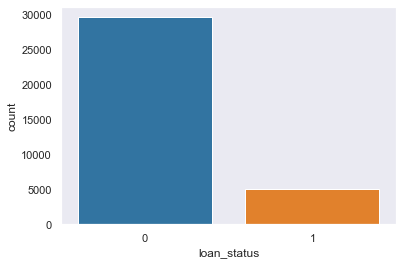

<Figure size 864x360 with 0 Axes>

In [45]:
#let's plot the data to check the number of defaulters
sns.countplot(x = 'loan_status', data=data)
plt.figure(figsize =(12, 5))
plt.show()

We have more data for customers who paid the loan than of those who charged off.

In [46]:
#Creating custom function for plotting the univariate data in bar plot with proportion
def bar_plot(col, xlabel, title):
    cross_tab = pd.crosstab(index=data[col],
                                 columns=data['loan_status'])
    cross_tab_prop = pd.crosstab(index=data[col],
                                 columns=data['loan_status'],
                                 normalize="index")
    cross_tab_prop.plot(kind='bar', stacked=True, colormap='tab10')

   
    plt.legend(loc="upper right", ncol=2)
    plt.xlabel(xlabel)
    plt.ylabel("Proportion")
    plt.title(title)

    for n, x in enumerate([*cross_tab.index.values]):
        for proportion in cross_tab_prop.loc[x]:

            plt.text(x=n,
                     y=proportion,
                     s=f'{round((100 - (np.round(proportion * 100, 1))),1)}%', 
                     color="black",
                     fontsize=12,
                     fontweight="bold")

    plt.show()

In [47]:
#Creating custom function for plotting the univariate data in bar plot
def continuous_univariate_bar(col, figsize=(14,7)):
    plt.figure(figsize=figsize)
    sns.barplot(x=col, y='loan_status', data=data)
    plt.xlabel(col)
    plt.ylabel("defaulter ratio")
    plt.title("Defaulters vs " + col)
    plt.show()

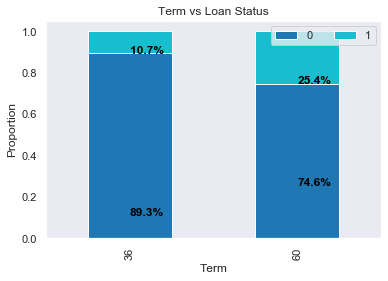

In [48]:
#plotting the bar plot to check defaulter rate for different terms
bar_plot('term', "Term", "Term vs Loan Status")

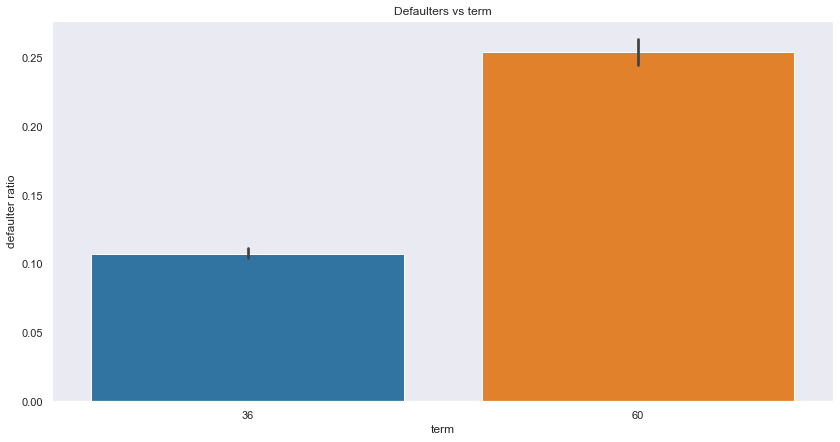

In [49]:
continuous_univariate_bar('term')

### Observation
Customers with loan for 60 terms have high tendency to be defaulters than of those with 36 terms. 
We can infer that, customer with longer commitment for loan can be defaulters than with shorter 
commitments

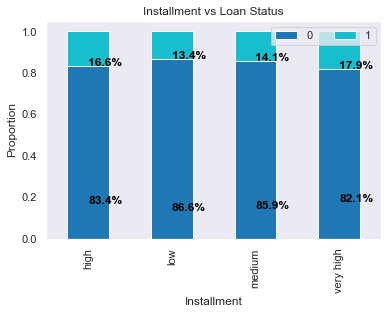

In [50]:
#plotting the bar plot to check defaulter rate for different installment values
bar_plot('installment', "Installment", "Installment vs Loan Status")

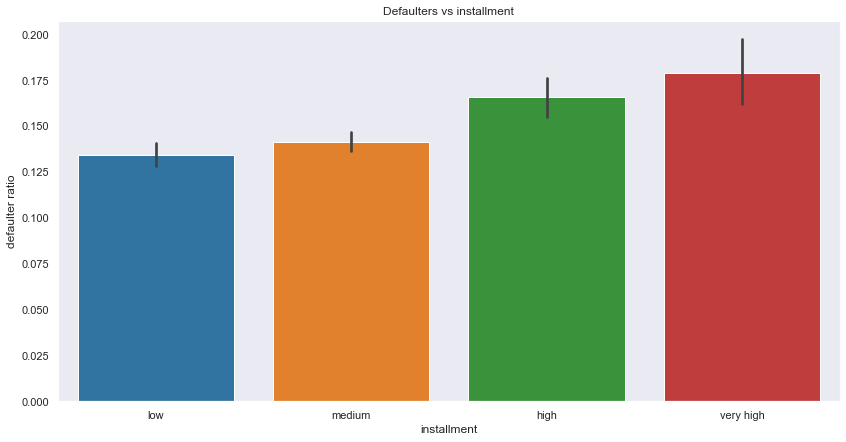

In [51]:
continuous_univariate_bar('installment')

### Observation
Customers with high and very installments are tend to defaulters than those with low installments. 

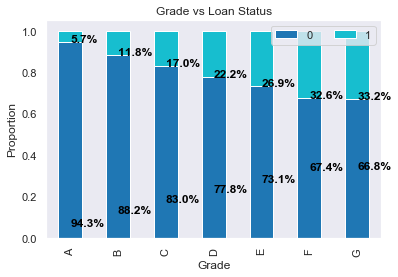

In [52]:
#plotting the bar plot to check defaulter rate for different grades
bar_plot('grade', "Grade", "Grade vs Loan Status")

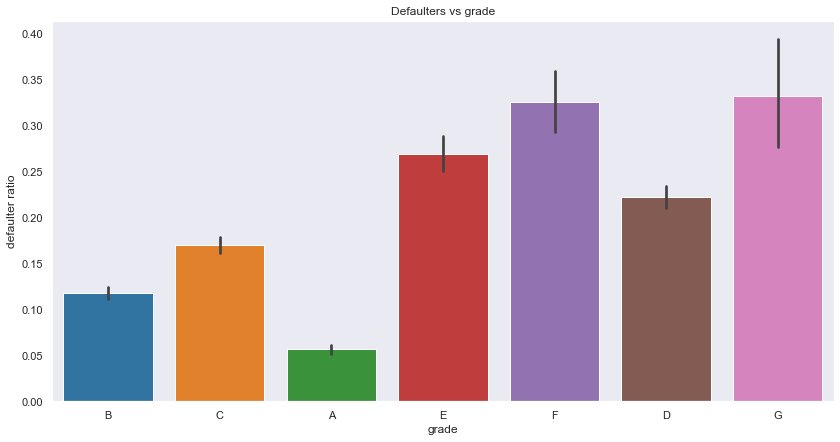

In [53]:
continuous_univariate_bar('grade')

### Observation
As we go from left to right, with the category, the number of defaulters increases. 
Club needs to check for the background thoroughly, if applicants is from category D, E or F

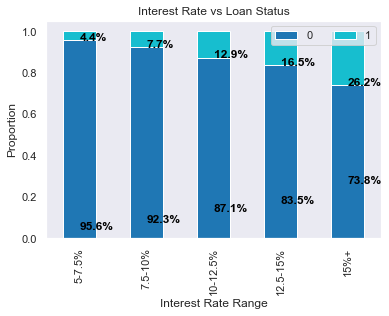

In [54]:
#plotting the bar plot to check defaulter rate for different interest rates
bar_plot('int_rate_r', "Interest Rate Range", "Interest Rate vs Loan Status")

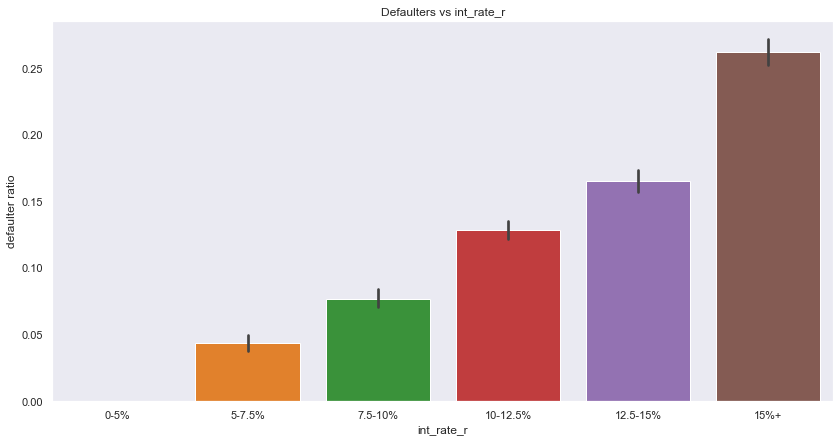

In [55]:
continuous_univariate_bar('int_rate_r')

### Observation
As we increase the interest rate for the loan, the chances of loan being charged off increases.
Higher the interest rate, higher the chances of the customer to be defaulter.

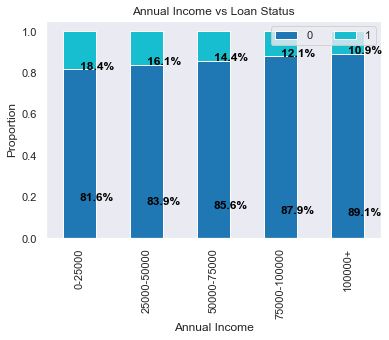

In [56]:
#plotting the bar plot to check defaulter rate for different annual income values
bar_plot('ann_inc_r', "Annual Income", "Annual Income vs Loan Status")

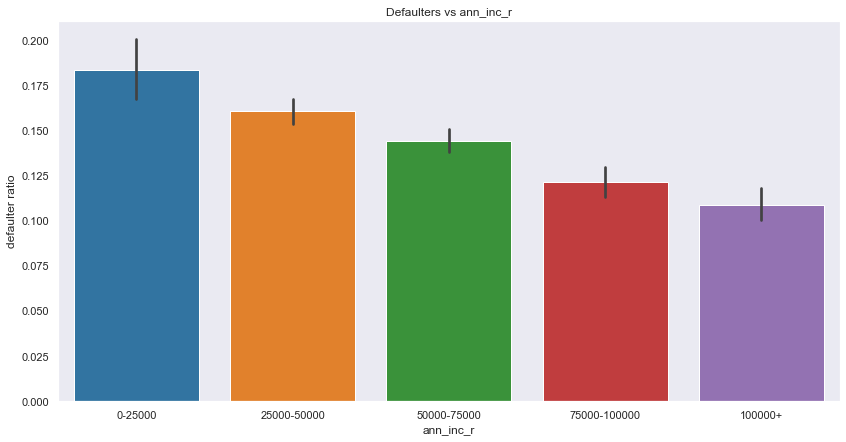

In [57]:
continuous_univariate_bar('ann_inc_r')

### Observation
Customers with high income, tend to pay the loan than with customers with low income.
We can infer that, as annual income(or salary) increase the chances to be defaulter decreases.


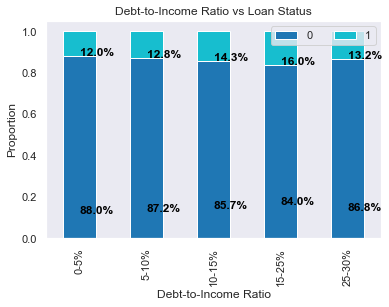

In [58]:
#plotting the bar plot to check defaulter rate for different debt-to-income ratios
bar_plot('dti_r', "Debt-to-Income Ratio", "Debt-to-Income Ratio vs Loan Status")

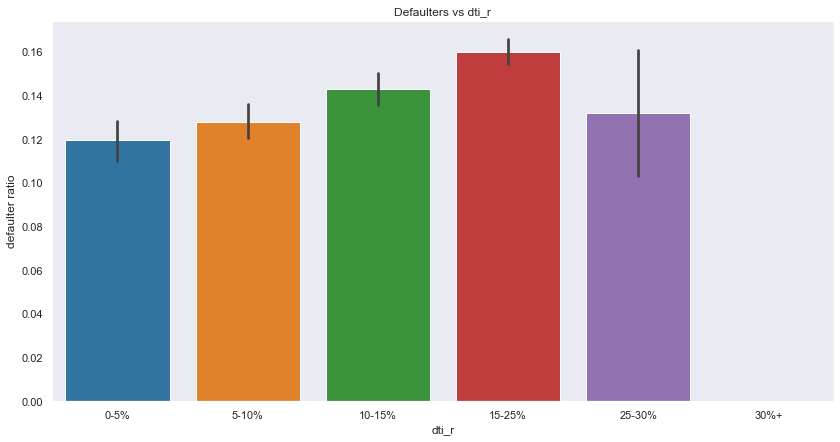

In [59]:
continuous_univariate_bar('dti_r')

### Observation
As the debt-to-ratio increases, the chances of getting charged off increases. Checking dti ratio will be useful while approving a loan.

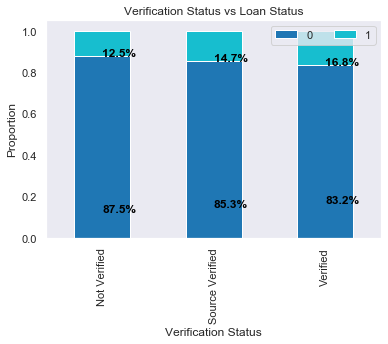

In [60]:
#plotting the bar plot to check defaulter rate for different verification status
bar_plot('verification_status', "Verification Status", "Verification Status vs Loan Status")

### Observation
Verification status don't say much about defaulter ratio. Source Verified and verified customers are charged off than those who are not verified. So, we can't say verification status impacting on defaulter ratio.

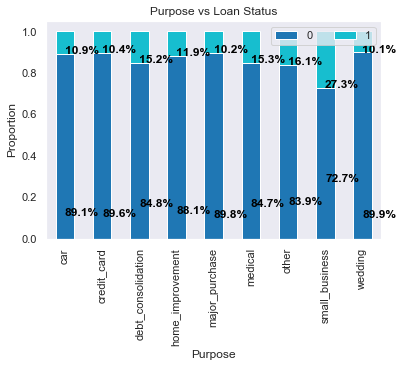

In [61]:
#plotting the bar plot to check defaulter rate for different purposes
bar_plot('purpose', "Purpose", "Purpose vs Loan Status")

### Observation
The purposes of loan like like small business and educational loans are less stable financially, so they tend be charged off. Also, loan to clear other loans are also tend be charged off.

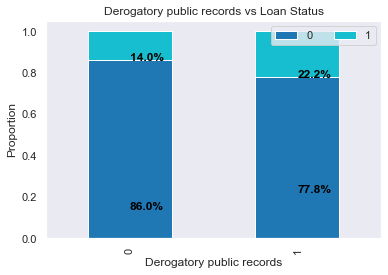

In [62]:
#plotting the bar plot to check defaulter rate for different derogatory public records
bar_plot('pub_rec', "Derogatory public records", "Derogatory public records vs Loan Status")

### Observation
If there are derogatory public records present, then the chances to be defaulter increases.

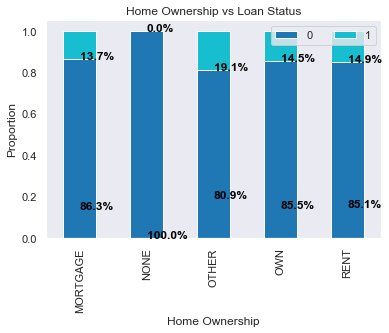

In [63]:
#plotting the bar plot to check defaulter rate for different types of home ownership
bar_plot('home_ownership', "Home Ownership", "Home Ownership vs Loan Status")

### Observation
Home Ownership don't say much about the defaulter ratio. But we can see, the 'Other' category of home ownership has more chances of getting charged off. So, while lending loan, LC can check for that.

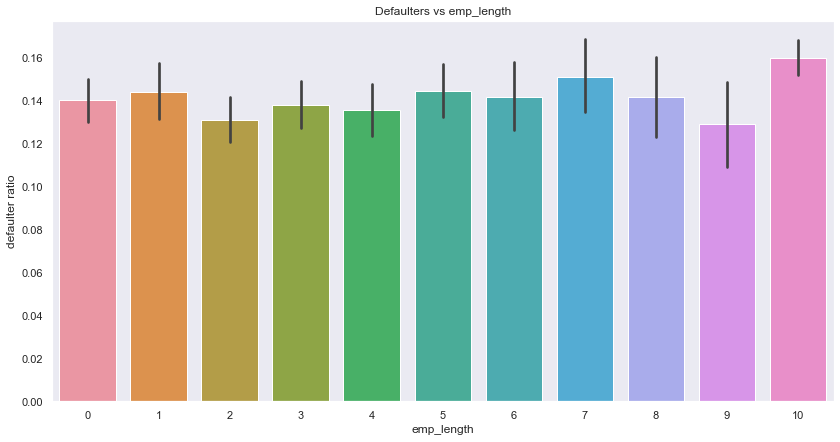

In [64]:
#plotting the bar plot to check defaulter rate for different employment lengths
continuous_univariate_bar('emp_length')

### Observation
Unexpectedly, employment length don't say much about being charged off.

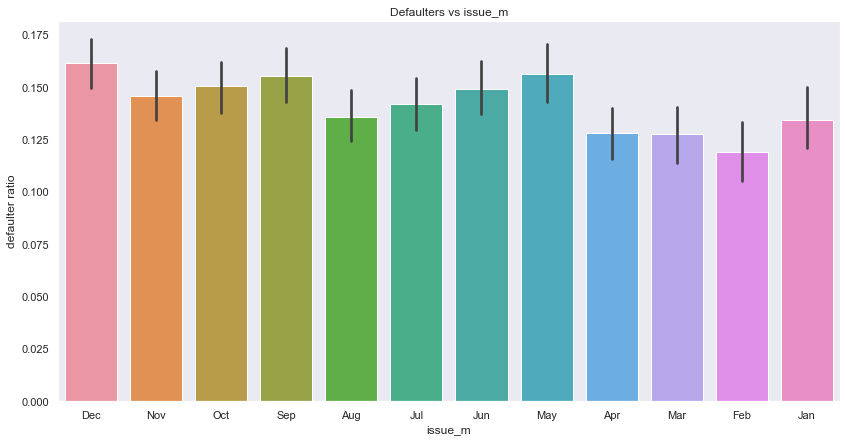

In [65]:
#plotting the bar plot to check defaulter rate for different months of loan funded
continuous_univariate_bar('issue_m')

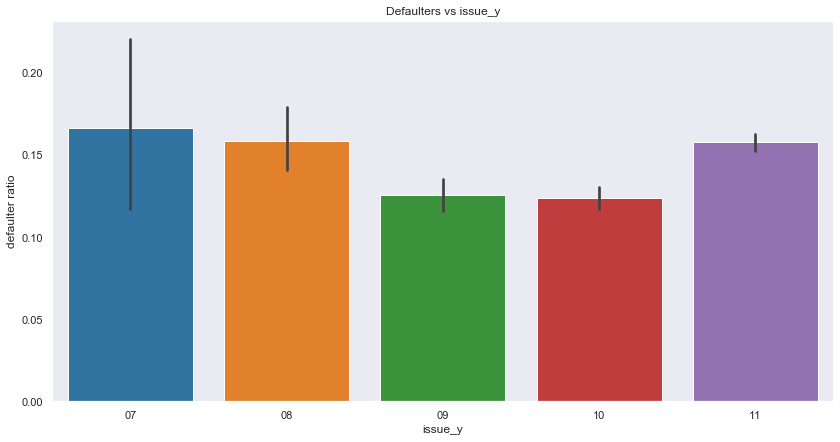

In [66]:
#plotting the bar plot to check defaulter rate for different years of loan funded
continuous_univariate_bar('issue_y')

### Observation
Month and Year of the loan funded, don't say much about being charged off or defaulter ratio.

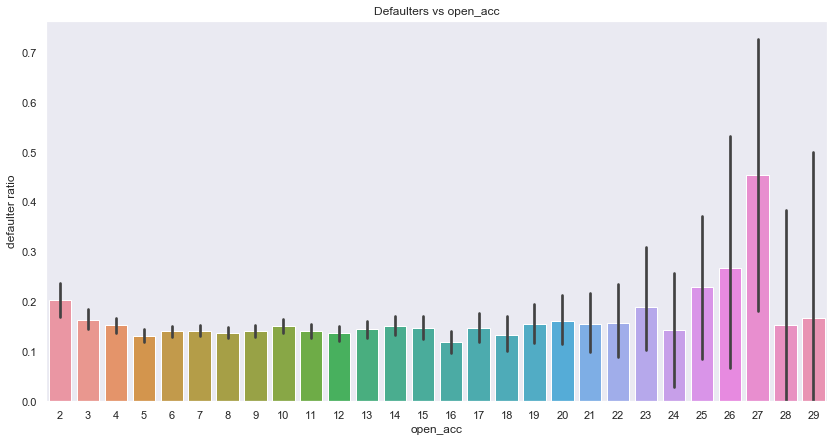

In [67]:
#plotting the bar plot to check defaulter rate for different number of open credit lines
continuous_univariate_bar('open_acc')

### Observation
We cannot conclude that the number of open credit lines have any impact on defaulter ratio.

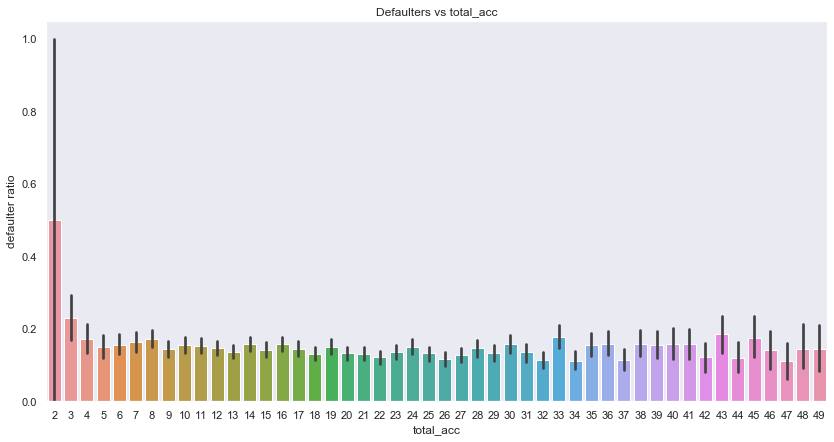

In [68]:
#plotting the bar plot to check defaulter rate for different total number of credit lines
continuous_univariate_bar('total_acc')

### Observation
We cannot conclude that the total number of credit lines have any impact on defaulter ratio.

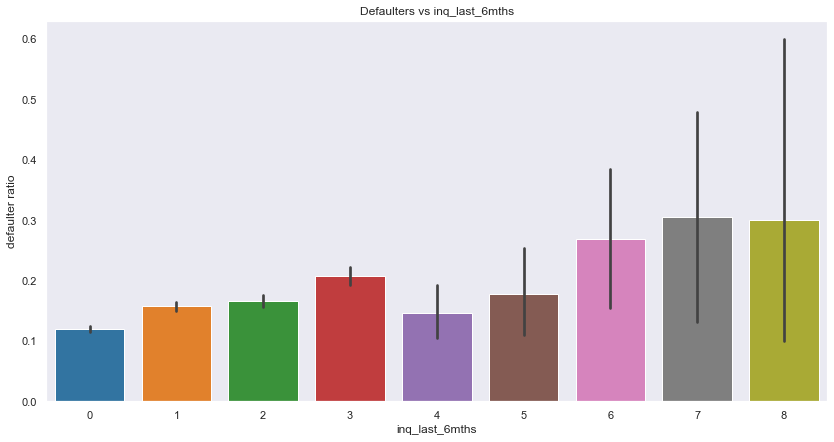

In [69]:
#plotting the bar plot to check defaulter rate for different number of inquiries in last 6 months
continuous_univariate_bar('inq_last_6mths')

### Observation
The trend is not throughout the spread, but we can say if number of inquiries in last 6 months are more than 5, we need to check the background of customer before approving the loan.

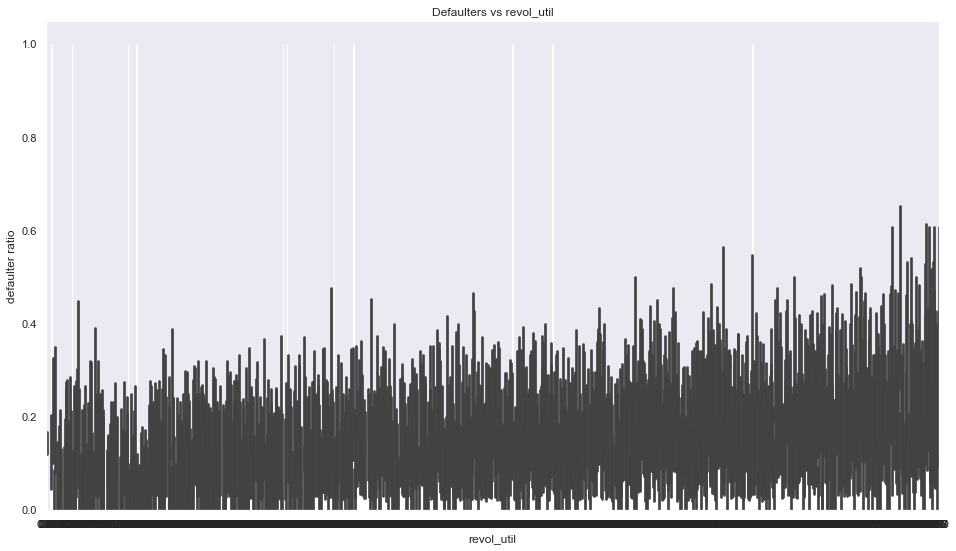

In [70]:
#plotting the bar plot to check defaulter rate for different total number of revolving utilization rates
continuous_univariate_bar('revol_util', figsize=(16,9))

### Observation
From above plot, ````revol_util```` has fluctuating defaulter ratio, and has 100% rate at some points and the magnitude is increasing as we go from left to right.

In [71]:
#creating custom function for bivariate bar plot
def bivariate_bar(col, hue):
    plt.figure(figsize=(12,6))
    sns.barplot(x=col, y='loan_status', hue=hue, data=data)
    plt.xlabel(col)
    plt.ylabel("defaulter ratio")
    plt.title("Defaulters vs " + col + " vs " + hue)
    plt.show()

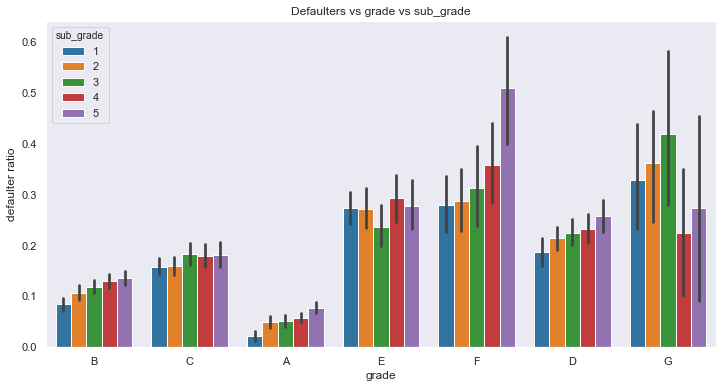

In [72]:
#plotting the bar plot to check defaulter rate for different grades and sub-grades
bivariate_bar('grade', 'sub_grade')

### Observation
The defaulter ratio for grades increasing when we go from categories A to G with respect to the sub-grades.

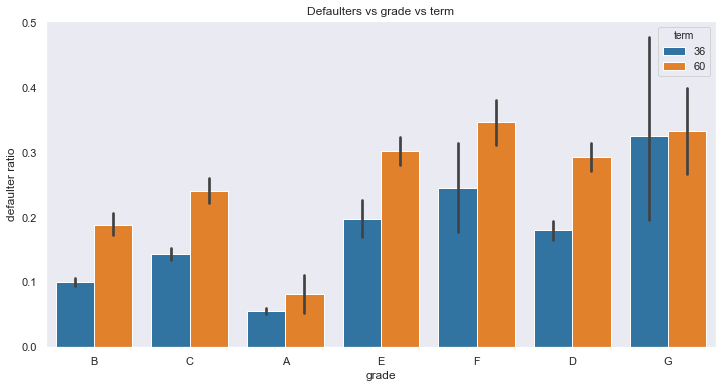

In [73]:
#plotting the bar plot to check defaulter rate for different grades and terms
bivariate_bar('grade', 'term')

### Observation
The defaulter ratio for grades increasing when we go from categories A to G with respect to the number of terms.

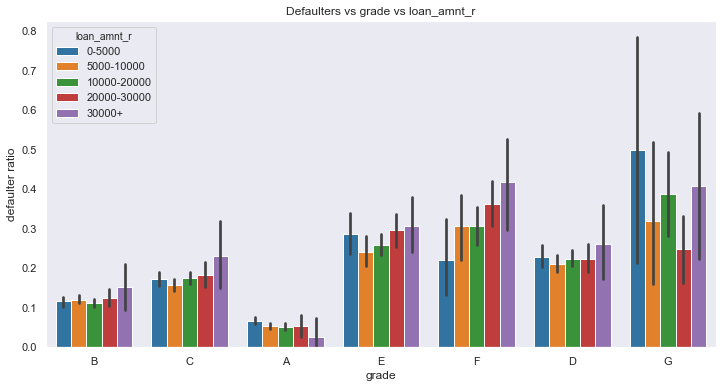

In [74]:
#plotting the bar plot to check defaulter rate for different grades and loan amounts
bivariate_bar('grade', 'loan_amnt_r')

### Observation
The defaulter ratio for grades increasing when we go from categories A to G and higher for loan amounts higher than 30000+.

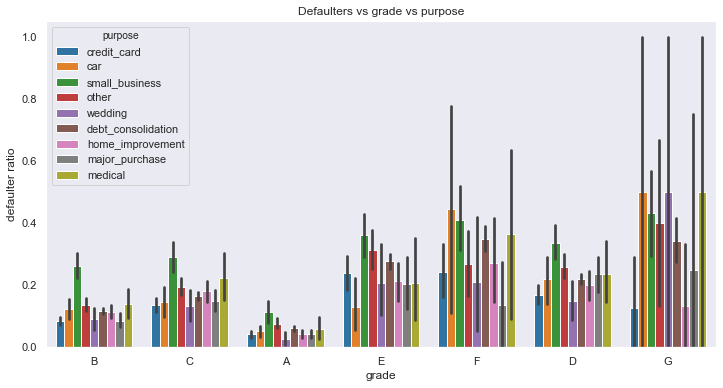

In [75]:
#plotting the bar plot to check defaulter rate for different grades and purposes
bivariate_bar('grade', 'purpose')

### Observation
The defaulter ratio for grades increasing when we go from categories A to G and higher for small business and medical loans.

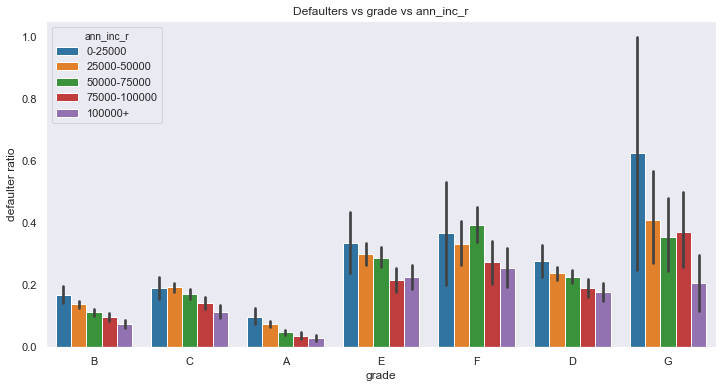

In [76]:
#plotting the bar plot to check defaulter rate for different grades and annual incomes
bivariate_bar('grade', 'ann_inc_r')

### Observation
The defaulter ratio for grades increasing when we go from categories A to G and decreases with increasing income.

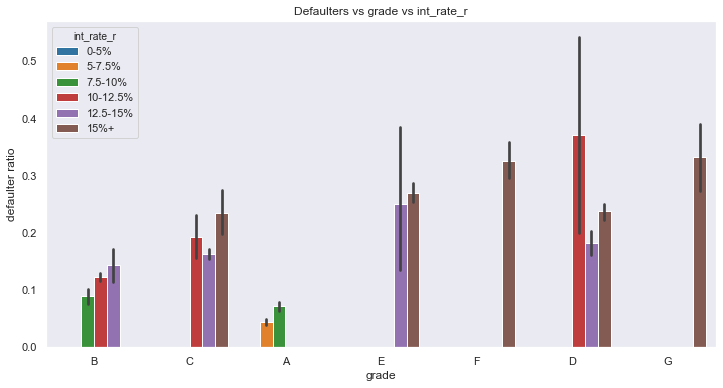

In [77]:
#plotting the bar plot to check defaulter rate for different grades and interest rates
bivariate_bar('grade', 'int_rate_r')

### Observation
The defaulter ratio for grades increasing when we go from categories A to G and the interest rate also increases when we go from left to right. We can see that, for categories E, F and G, the intrest rates are higher than 12.5%.

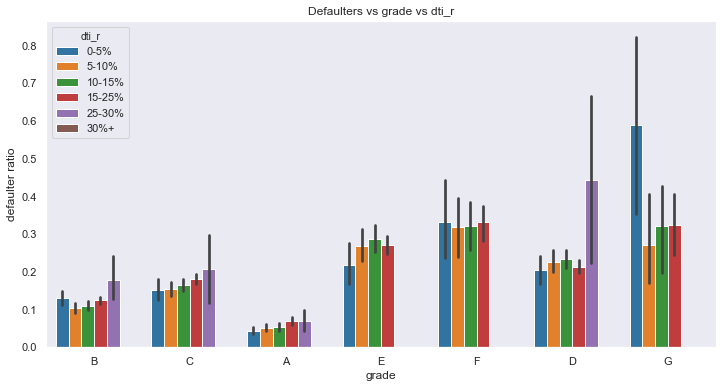

In [78]:
#plotting the bar plot to check defaulter rate for different grades and debt-to-income ratios
bivariate_bar('grade', 'dti_r')

### Observation
The defaulter ratio for grades increasing when we go from categories A to G with respect to the debt-to-income ratios.

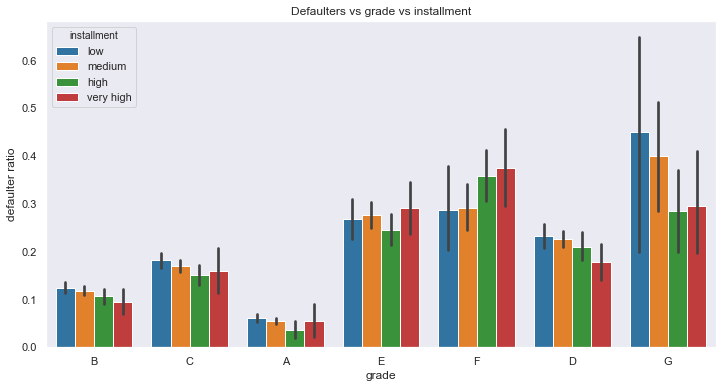

In [79]:
#plotting the bar plot to check defaulter rate for different grades and installments
bivariate_bar('grade', 'installment')

### Observation
The defaulter ratio for grades increasing when we go from categories A to G with respect to the installments. 

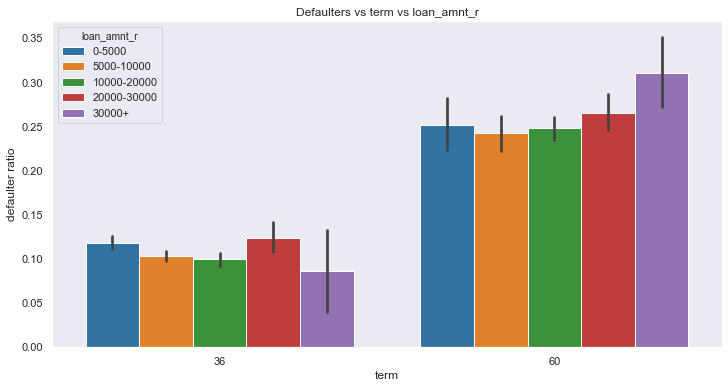

In [80]:
#plotting the bar plot to check defaulter rate for different terms and loan amounts
bivariate_bar('term', 'loan_amnt_r')

### Observation
The defaulter ratio for terms increases for 60 terms with respect to the loan amounts.

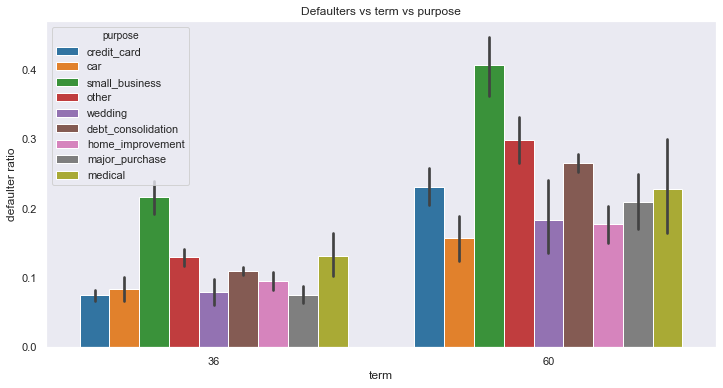

In [81]:
#plotting the bar plot to check defaulter rate for different terms and purposes
bivariate_bar('term', 'purpose')

### Observation
The defaulter ratio for terms increases for 60 terms and is higher for small business and medical purposes.

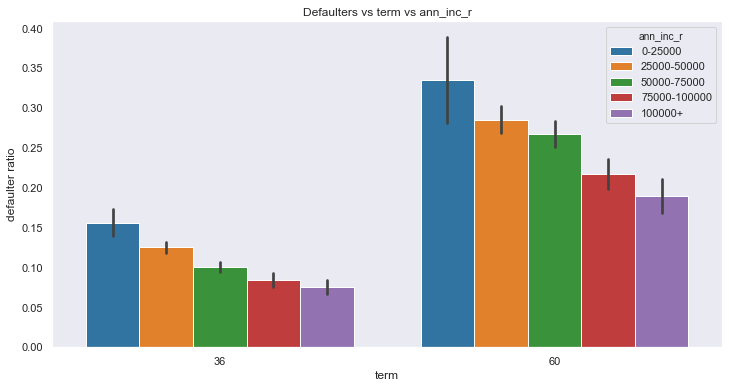

In [82]:
#plotting the bar plot to check defaulter rate for different terms and annual incomes
bivariate_bar('term', 'ann_inc_r')

### Observation
The defaulter ratio for terms increases for 60 terms and decreases with increasing annual incomes.

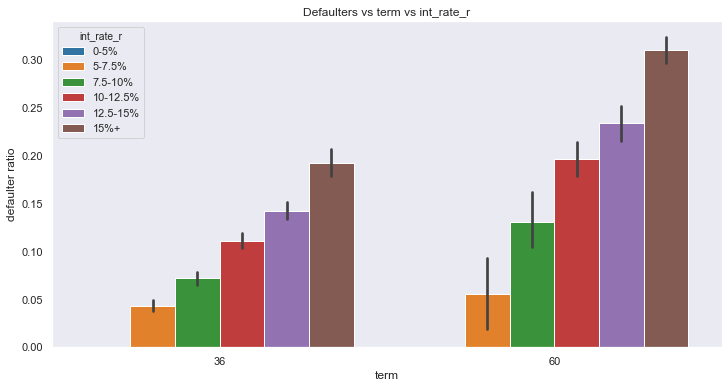

In [83]:
#plotting the bar plot to check defaulter rate for different terms and interest rates
bivariate_bar('term', 'int_rate_r')

### Observation
The defaulter ratio for terms increases for 60 terms with respect to the increaing interest rates.

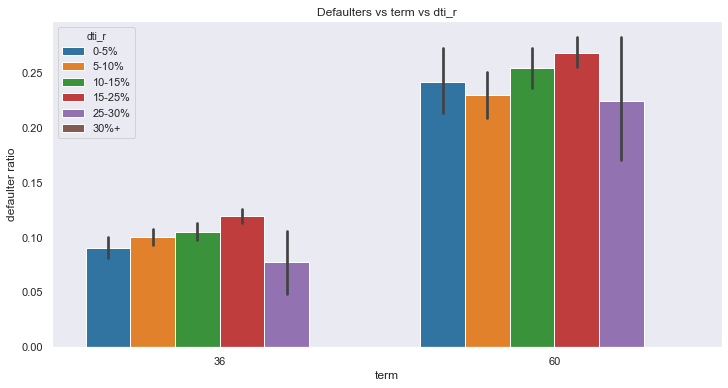

In [84]:
#plotting the bar plot to check defaulter rate for different terms and debt-to-income ratios
bivariate_bar('term', 'dti_r')

### Observation
The defaulter ratio for terms increases for 60 terms with respect to increasing debt-to-income ratios.

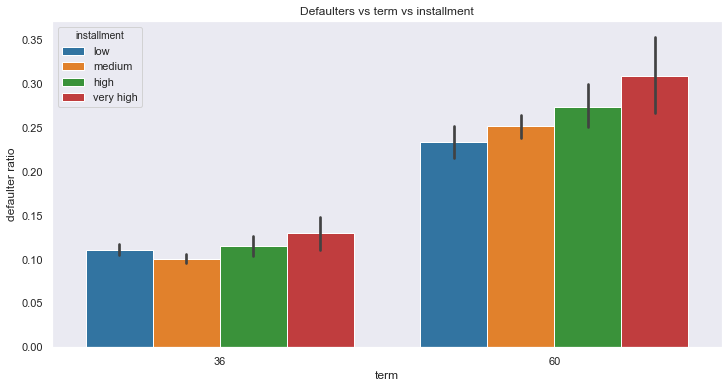

In [85]:
#plotting the bar plot to check defaulter rate for different terms and installments
bivariate_bar('term', 'installment')

### Observation
The defaulter ratio for terms increases for 60 terms and increases for high and very high installments

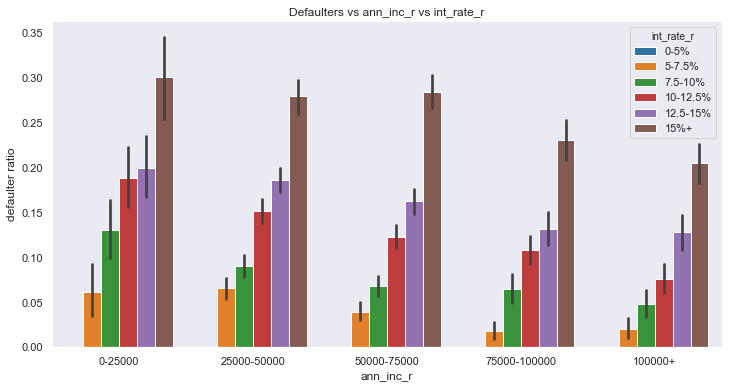

In [86]:
#plotting the bar plot to check defaulter rate for different annual incomes and interest rates
bivariate_bar('ann_inc_r', 'int_rate_r')

### Observation
The defaulter ratio for defaulter ratio decreases with increasing annual income and increases for increasing interest rates.

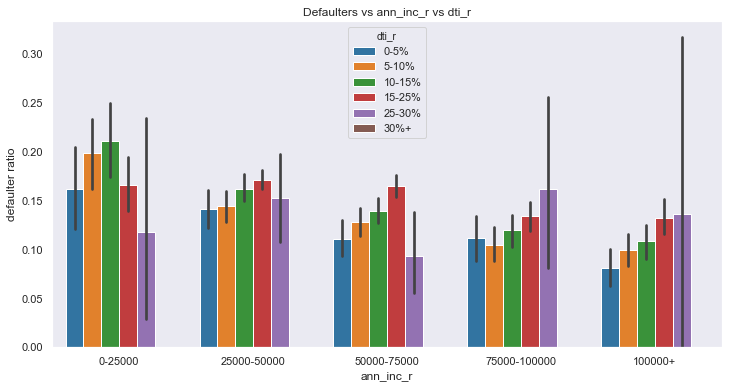

In [87]:
#plotting the bar plot to check defaulter rate for different annual incomes and debt-to-income ratios
bivariate_bar('ann_inc_r', 'dti_r')

### Observation
The defaulter ratio for defaulter ratio decreases with increasing annual income and increases for increasing debt-to-income ratios.

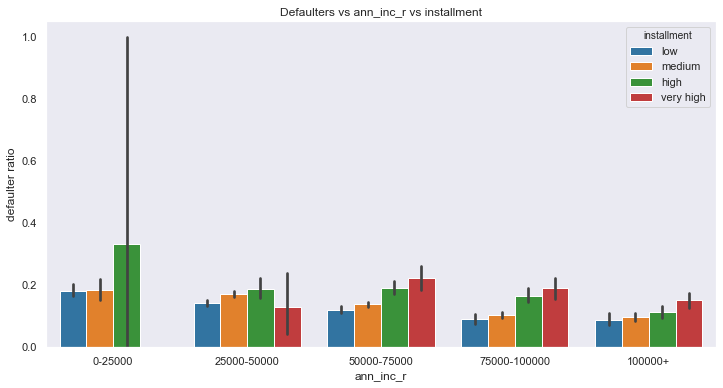

In [88]:
#plotting the bar plot to check defaulter rate for different annual incomes and installments
bivariate_bar('ann_inc_r', 'installment')

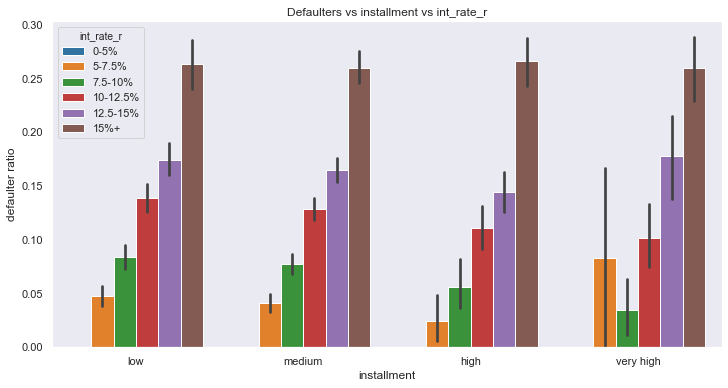

In [89]:
#plotting the bar plot to check defaulter rate for different installments and interest rates
bivariate_bar('installment', 'int_rate_r')

### Observation
The defaulter ratio for defaulter ratio increases with increasing installments and increases for increasing interest rates.

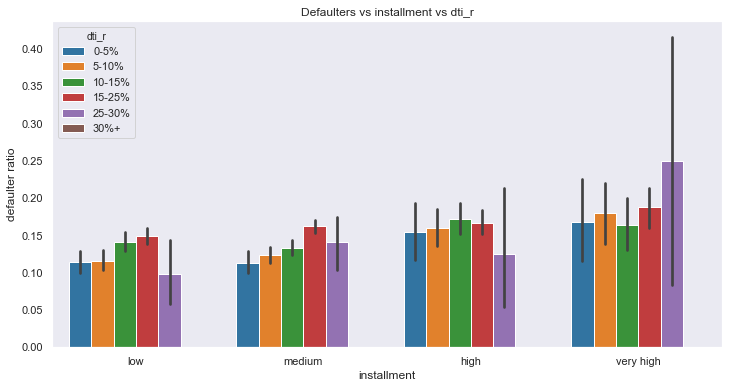

In [90]:
#plotting the bar plot to check defaulter rate for different installments and debt-to-income ratios
bivariate_bar('installment', 'dti_r')

### Observation
The defaulter ratio for defaulter ratio increases with increasing installments and increases for increasing debt-to-income ratios.

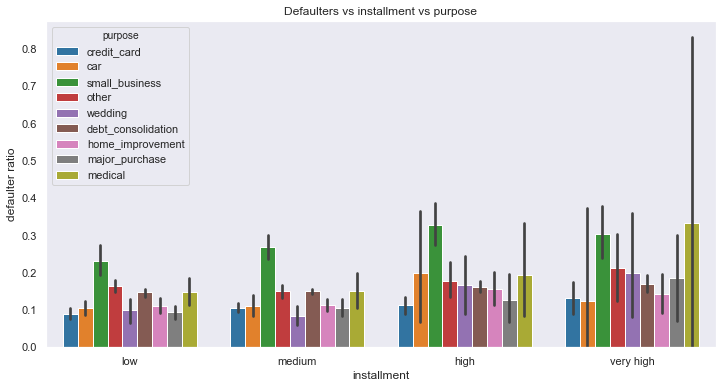

In [91]:
#plotting the bar plot to check defaulter rate for different installments and purposes
bivariate_bar('installment', 'purpose')

### Observation
The defaulter ratio for defaulter ratio increases with increasing installments and is higher for small business, medical purposes.

## Key Takeaways from the Analysis 
- Higher income decreases defaulter ratio.
- Higher interest rates increases defaulter ratio.
- When we go from category A-G, the defaulter ratio increases and also the interest rates are high for categories D, E, F and G.
- Higher the number of terms, higher the defaulter ratio.
- High and very high installments tend to have higher defaulter ratio.
- Category A and B have low interest rates as well as low defaulter ratio, so more loans can accepted for that applicants.
- High income is also a feature of customers that pays loans, so more loans can be accepted for customers with high income.
- Unsecured Purposes like small business and medical loans tend to be charged off.
- More number of derogatory public records and inquiries for last 6 months can increase the chances of being defaulter.
